In [1]:
# Retrieve the DataFrame from the notebook storage
%store -r activity_data


#Using one Activity ID for parameter estimation

In [2]:

# Filter rows with activity_id equal to 8746996449
activity_8746996449_df = activity_data[activity_data['activity_id'] == 8746996449].copy()
# Unlist power and heartrate columns
activity_8746996449_df = activity_8746996449_df.explode(['heartrate','power'])
# Create a time column with sequential values starting from 1
activity_8746996449_df['time'] = range(1, len(activity_8746996449_df) + 1)

activity_8746996449_df = activity_8746996449_df.head(3600)

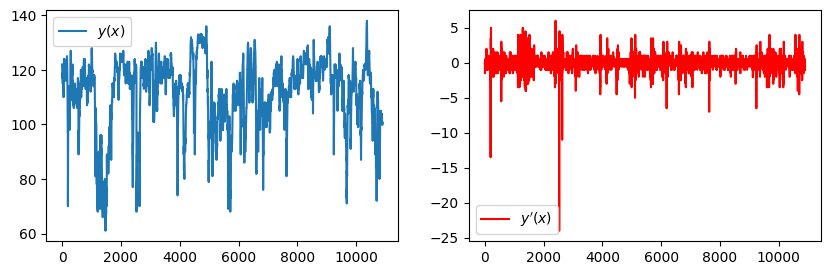

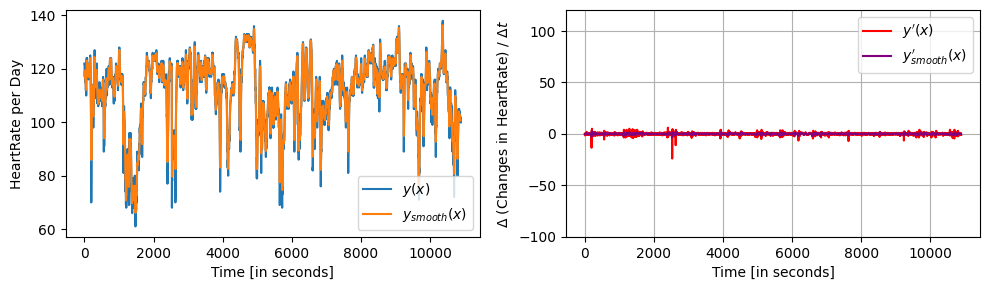

In [68]:
# import numpy as np
# import matplotlib.pyplot as plt
#
# y = activity_8746996449_df['heartrate']
# x = activity_8746996449_df['time']
#
# dydx = np.gradient(y,x)
# fig1, ax = plt.subplots(1, 2, figsize=(10,3))
# ax[0].plot(x,y, label='$y(x)$')
# ax[1].plot(x,dydx, label='$y\'(x)$', color='r')
# [a.legend() for a in ax]
# plt.show()
#
#
# filt = np.ones(15)/15
# y_smooth = np.convolve(y, filt, mode='valid')
# dysdx = np.gradient(y_smooth, x[7:-7])
# fig2, ax = plt.subplots(1, 2, figsize=(10,3))
# ax[0].plot(x,y, label='$y(x)$')
# ax[0].plot(x[7:-7], y_smooth, label=r'$y_{{smooth}}(x)$')
# ax[1].plot(x,dydx, label='$y\'(x)$', color='r')
# ax[1].plot(x[7:-7],dysdx, label='$y_{smooth}\'(x)$', color='purple')
# ax[1].set_ylim(-100,120)
# ax[1].grid()
# [a.legend() for a in ax]
# [a.set_xlabel('Time [in seconds]') for a in ax]
# ax[0].set_ylabel('HeartRate')
# ax[1].set_ylabel('$\Delta$ (Changes in HeartRate) / $\Delta t$')
# fig2.tight_layout()
# plt.show()


#dx = np.diff(time_val)
#dy = np.diff(heartrate_val)
#d = dy/dx
#
# from derivative import dxdt
#
# x = time_val
# y = np.sin(heartrate_val)
# result2 = dxdt(y, x,  kind="savitzky_golay", left=0.1, right=0.1, order=2)
#


In [69]:
# from scipy.optimize import least_squares
# from scipy.integrate import odeint
#
#
# heartrate_val = activity_8746996449_df['heartrate']
# time_val = activity_8746996449_df['time']
# power_val = activity_8746996449_df['power']
#
# def ode_model(data, t, a, b, c):
#     hr, p = data
#     dhr_dt = a * hr + b * p + c
#     dp_dt = 0  # Assuming power doesn't affect its own rate of change
#     return [dhr_dt, dp_dt]
#
#
# def objective(coefficients):
#     data_val = [heartrate_val, power_val]  # Initial conditions
#     predicted = odeint(ode_model, data_val, time, args=tuple(coefficients))
#     residuals = heart_rate - predicted[:, 0]  # Calculate residuals (compare observed heart rate with predicted)
#     return residuals
#
# hr_0 = heartrate_val[0]
# tau = 40
# k = 0.025
#
#
# param_guess = [hr_0, tau, k]
# result = least_squares(objective, param_guess)
# best_coefficients = result.x



In [20]:
from scipy.integrate import odeint, solve_ivp
import numpy as np
import matplotlib.pyplot as plt

heartrate_val = activity_8746996449_df['heartrate'].values
time_val = activity_8746996449_df['time'].values
power_val = activity_8746996449_df['power'].values
HR0 = heartrate_val[0]

def model_func(t, HR):
    i = int(t)
    K = 0.26
    tau = 42.0
    pow = power_val[i]
    dy_dt = (HR - heartrate_val[i]) / tau + (K / tau) * pow
    return dy_dt

t_span = np.array([1,3599])
#sol_m1 = odeint(model_func, K, t, tau, tfirst=True)
#sol_m2 = solve_ivp(model_func, t_span=(0,max(t)), y0=[HR0], t_eval=t)
HR_0 = np.array([HR0])

sol = solve_ivp(model_func, t_span, y0=HR_0)
print(sol)
# Access the solution from the OdeResult object
time_solution = sol.t
heart_rate_solution = sol.y[0]



  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 1.000e+00  1.246e+00 ...  3.547e+03  3.599e+03]
        y: [[ 1.220e+02  1.223e+02 ...  3.214e+38  1.110e+39]]
      sol: None
 t_events: None
 y_events: None
     nfev: 398
     njev: 0
      nlu: 0
